# Credit Card Churn and Machine Learning Classification Application

## 1. Problem Statement and Methodology

Credit card churn is a constant concern for financial institutions, as customer loss can result in significant revenue loss and loss of market share. Faced with this challenge, companies seek to understand the factors that lead customers to close their credit cards and develop effective strategies to prevent churn.

A promising approach to addressing credit card churn is the application of machine learning classification techniques. These techniques allow predicting whether a customer is likely to cancel their credit card based on a variety of variables, such as transaction history, payment behavior, customer service interactions, and demographic information.

Applying machine learning classification in the context of credit card churn involves several steps. First, it is necessary to collect and prepare the relevant data for modeling, ensuring that it is clean, complete, and ready for analysis. This may involve integrating data from multiple sources, selecting relevant features, and encoding categorical variables.

The prepared data is then split into training and testing sets, and a classification algorithm such as logistic regression, decision trees, random forests, or neural networks is trained on the training data. During training, the algorithm learns patterns in the data that are associated with churn and adjusts its parameters to optimize the model's performance.

After training, the model is evaluated using test data to check its ability to generalize to new data. This involves analyzing performance metrics such as precision, recall, F1-score, and area under the ROC curve to determine how well the model is able to predict churn.

Based on the model evaluation, the algorithm's parameters can be adjusted and the model refined to improve its accuracy and generalization. Once a satisfactory model has been developed, it can be deployed into production and used to predict churn in real time, allowing companies to identify at-risk customers and implement proactive retention measures.

In summary, applying machine learning classification in the context of credit card churn offers a powerful and effective approach to preventing customer loss and maintaining long-term profitability. By accurately predicting churn, financial institutions can take proactive steps to retain customers, improve customer satisfaction, and drive long-term business growth.

## 2. Loading the Dataset

In [3]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Python_101"

Mounted at /content/drive
/content/drive/MyDrive/Python_101


In [5]:
# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import SVG

# Configuration for graphs width and layout of graphs
sns.set_theme(style='whitegrid')
palette='viridis'

In [6]:
data = pd.read_csv("credit_card_churn.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Exploring the data

In [7]:
# Set Pandas options to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
# Viewing first 5 data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [9]:
# Viewing last 5 data
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [10]:
# Rows and columns
data.shape

(10127, 21)

In [11]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [12]:
# Data type
data.dtypes

,0
CLIENTNUM,int64
Attrition_Flag,object
Customer_Age,int64
Gender,object
Dependent_count,int64
Education_Level,object
Marital_Status,object
Income_Category,object
Card_Category,object
Months_on_book,int64


- **CLIENTNUM:** Unique identification number for each customer.
- **Attrition_Flag:** Indicates whether the customer has canceled the credit card (churn). Can have values ​​such as "Existing Customer" or "Attrited Customer".
- **Customer_Age:** Age of the customer.
- **Gender:** Gender of the customer.
- **Dependent_count:** Number of dependents of the customer.
- **Education_Level:** Level of education of the customer.
- **Marital_Status:** Marital status of the customer.
- **Income_Category:** Income category of the customer.
- **Card_Category:** Credit card category (e.g. "Blue", "Silver", "Gold", "Platinum").
- **Months_on_book:** Number of months since the customer opened the account.
- **Total_Relationship_Count:** Total number of banking products the customer has.
- **Months_Inactive_12_mon:** Number of months the customer was inactive in the last 12 months.
- **Contacts_Count_12_mon:** Number of contacts the customer had with the institution in the last 12 months.
- **Credit_Limit:** Customer's credit limit.
- **Total_Revolving_Bal:** Customer's total revolving credit balance.
- **Avg_Open_To_Buy:** Average amount available for purchase.
- **Total_Amt_Chng_Q4_Q1:** Percentage change in transaction amount from last quarter to first quarter.
- **Total_Trans_Amt:** Total amount of transactions made by the customer.
- **Total_Trans_Ct:** Total transactions made by the customer.
- **Total_Ct_Chng_Q4_Q1:** Percentage change in number of transactions from last quarter to first quarter.
- **Avg_Utilization_Ratio:** Average credit utilization ratio.

## 3. Exploratory Data analysis



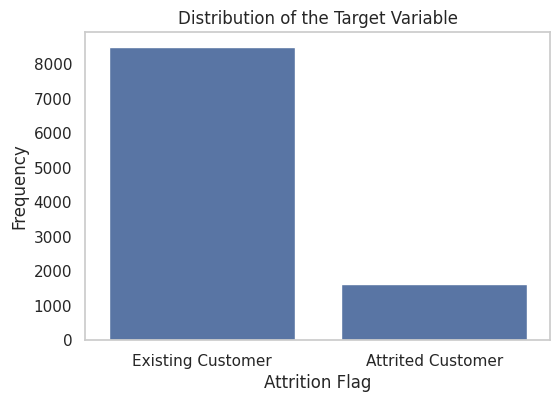

In [13]:
# Frequency distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data, x='Attrition_Flag')
plt.title('Distribution of the Target Variable')
plt.xlabel('Attrition Flag')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

**Analysis:** Here, this variable represents the columns, such as churn and non-churn, which are essential attributes for training a machine learning model. The target column, in this context, refers to the variable that the model will try to predict or classify, such as churn, which is crucial for analyzing and predicting customer behavior.

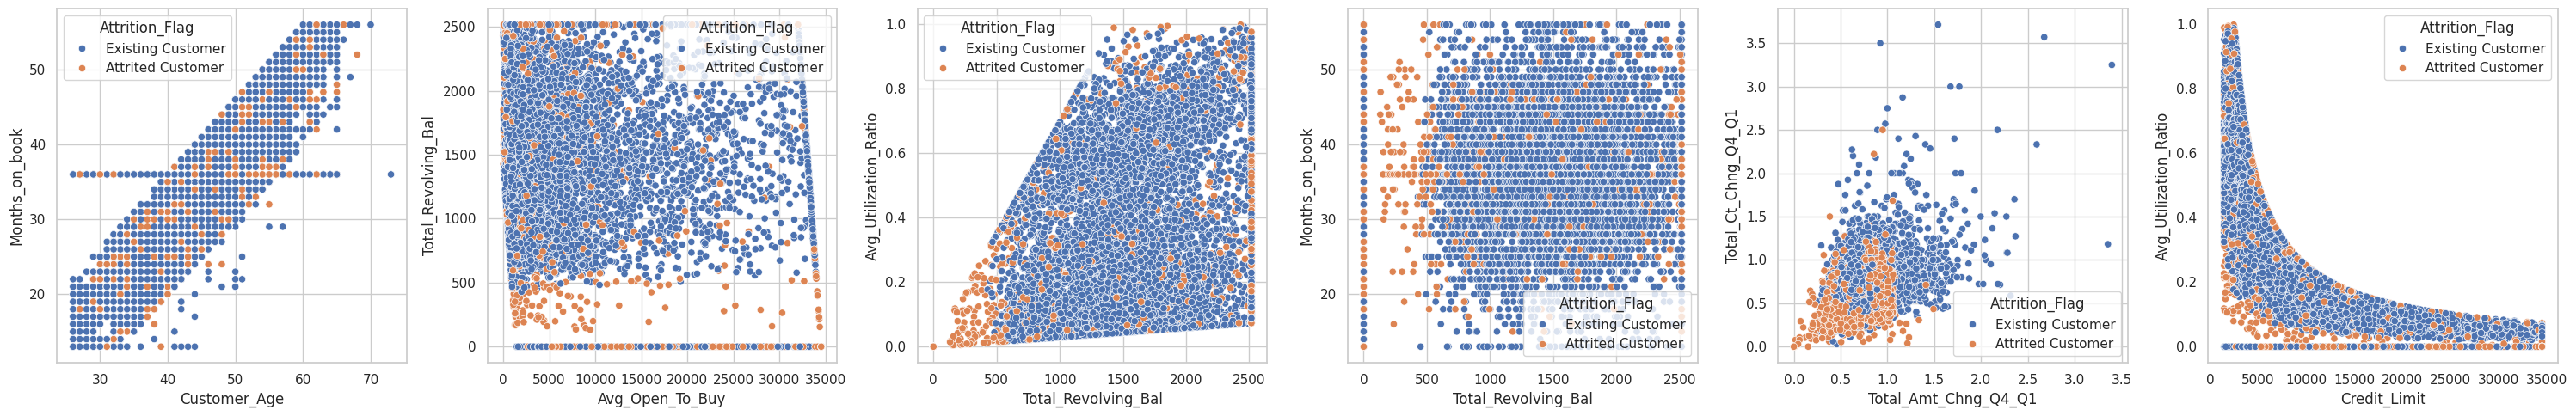

In [14]:
fig, axes = plt.subplots(1, 6, figsize=(30, 5))

sns.scatterplot(data=data, x='Customer_Age', y='Months_on_book', hue='Attrition_Flag', ax=axes[0])
sns.scatterplot(data=data, x='Avg_Open_To_Buy', y='Total_Revolving_Bal',  hue='Attrition_Flag', ax=axes[1])
sns.scatterplot(data=data, x='Total_Revolving_Bal', y='Avg_Utilization_Ratio',  hue='Attrition_Flag', ax=axes[2])
sns.scatterplot(data=data, x='Total_Revolving_Bal', y='Months_on_book',  hue='Attrition_Flag', ax=axes[3])
sns.scatterplot(data=data, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1',  hue='Attrition_Flag', ax=axes[4])
sns.scatterplot(data=data, x='Credit_Limit', y='Avg_Utilization_Ratio',  hue='Attrition_Flag', ax=axes[5])
plt.tight_layout()
plt.grid(False)
plt.show();

**Analysis:** Interestingly, credit limit and average utilization rate exhibit an exponential decreasing relationship! This indicates that as the credit limit increases, the average utilization rate decreases at an exponential rate. Therefore, customers with higher credit limits use their credit cards less frequently.

This dynamic suggests that there is a non-linear relationship between credit limit and card usage, with a steeper decrease in utilization rate as the credit limit increases. This could be a valuable insight for the bank to understand its customers’ spending patterns and adjust its credit management and customer retention strategies.

### Outlier Analysis


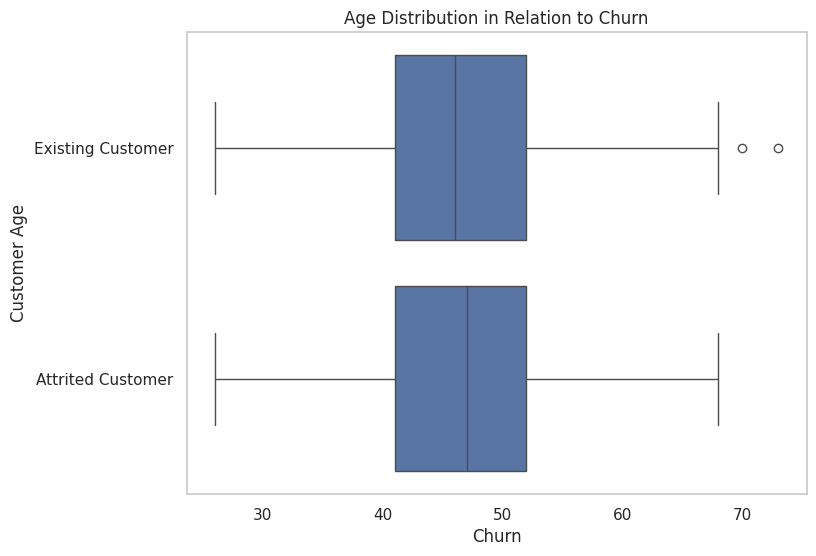

In [15]:
# Analysis of the Relationship between Age and Other Variables
plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer_Age', y='Attrition_Flag', data=data)
plt.title('Age Distribution in Relation to Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Age')
plt.grid(False)
plt.show();

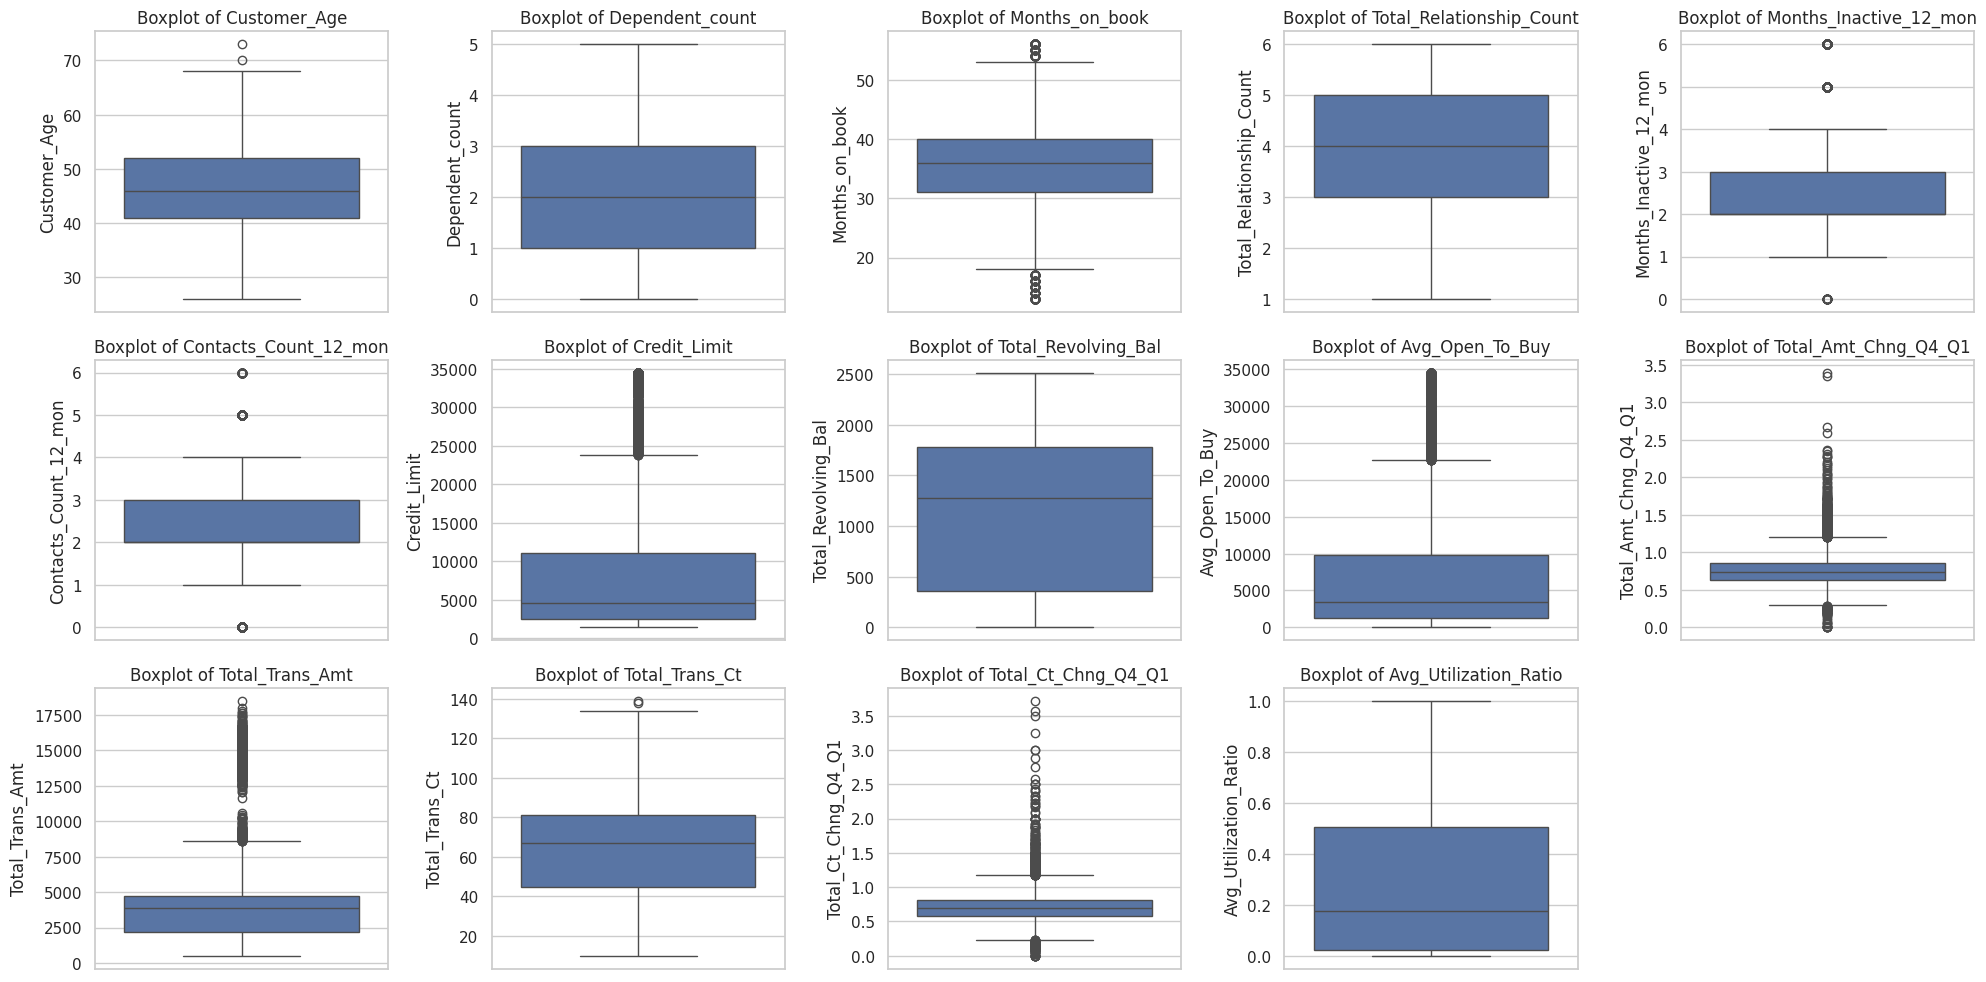

In [16]:
# Select only the specified variables
selected_vars = ["Customer_Age", "Dependent_count", "Months_on_book",
                 "Total_Relationship_Count", "Months_Inactive_12_mon",
                 "Contacts_Count_12_mon", "Credit_Limit", "Total_Revolving_Bal",
                 "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt",
                 "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"]

# Set the plot size
plt.figure(figsize=(20, 10))

# Iterate over the selected variables and create a boxplot for each one
for i, col in enumerate(selected_vars):
    plt.subplot(3, 5, i+1)
    sns.boxplot(data=data, y=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

## 4. Data Cleaning


In [17]:
# Check for null data in each column
null_values = data.isnull().sum()

# Display the columns with null data and the number of null values ​​in each
print("Null Data:")
print(null_values)

Null Data:
CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [18]:
# Check for NaN data in each column
nan_values = data.isna().sum()

# Display the columns with NaN data and the number of NaN values ​​in each
print("NaN data:")
print(nan_values)

NaN data:
CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [19]:
# Check for missing data in each column
missing_values = data.isnull().sum()

# Display the columns with missing data and the number of missing values ​​in each
print("Missing Data:")
print(missing_values)

Missing Data:
CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [20]:
# Check for missing data in the entire DataFrame
missing_values_all = data.isnull()

# Display the DataFrame with True for missing values ​​and False for non-missing values
missing_values_all.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Preprocessing


In [21]:
# Delete the ID column as its not used in modeling
data.drop(columns=['CLIENTNUM'], inplace=True)
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [22]:
# Create a mapping dictionary
mapping = {'Attrited Customer': 1,
           'Existing Customer': 0}

# Apply mapping to convert column to numeric
data['Attrition_Flag'] = data['Attrition_Flag'].replace(mapping)

# Viewing dataset
data.head()

/tmp/ipython-input-3320256517.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Attrition_Flag'] = data['Attrition_Flag'].replace(mapping)


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## 5. Feature Engineering


**Feature engineering**

Feature engineering is a crucial step in the data preparation process in data science and machine learning. It involves creating or transforming variables (also known as features) to improve the performance of machine learning models. Good feature engineering can increase model accuracy, reduce overfitting, and ultimately generate more meaningful insights from the data.

There are several feature engineering techniques, including creating new features from existing ones, normalizing data, handling missing values, and converting categorical variables to numeric variables, among others. Each technique is applied according to the nature of the data and the requirements of the problem at hand.-

**Label Encoder**

Label Encoder is a commonly used technique to convert categorical variables to numeric variables. In many datasets, it is common to find categorical variables that represent textual categories, such as “high,” “medium,” and “low,” or “yes” and “no.” However, most machine learning algorithms only accept numeric inputs. Therefore, it is necessary to convert these categorical variables into numbers before feeding them to the models.

The Label Encoder assigns a unique value to each category present in the categorical variable. For example, if we have a variable called "Size" with the categories "Small", "Medium" and "Large", the Label Encoder can assign the values 0, 1 and 2, respectively, to these categories. In this way, the categories are represented by integers, making them suitable for analysis by machine learning algorithms.

It is important to mention that the Label Encoder is more appropriate for ordinal categorical variables, that is, those in which there is an intrinsic order between the categories. For nominal categorical variables, where there is no such order, other techniques, such as One-Hot Encoding, may be more appropriate.

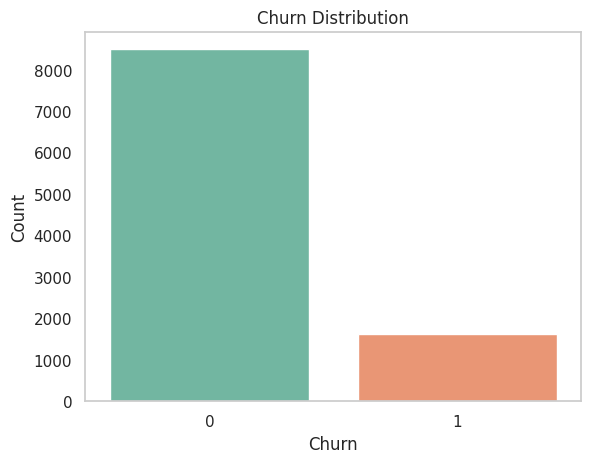

In [23]:
# Checking the target column with plot
sns.countplot(x="Attrition_Flag", data=data, palette='Set2', hue= "Attrition_Flag", legend= None)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.grid(False)
plt.show();

In [24]:
# Importing library
from sklearn.preprocessing import LabelEncoder

# Creating the Label encoder
Label_pre = LabelEncoder()

# Data type transformation
data_cols=data.select_dtypes(exclude=['int','float']).columns
label_col =list(data_cols)

# Applying encoder
data[label_col]=data[label_col].apply(lambda col:Label_pre.fit_transform(col))

# Viewing
Label_pre

LabelEncoder()

In [25]:
# Viewing dataset
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [26]:
# Saved dataset with Label Encoder
data.to_csv("dataset_LabelEncoder.csv")

## 6. Preparation for Model training

### Target 'y'

In [27]:
# Split the data into features (X) and target (y)
X = data.drop("Attrition_Flag", axis=1) # Drop the target column to get the features
y = data["Attrition_Flag"] # Set the target column

In [28]:
# Viewing rows and column x
X.shape

(10127, 19)

In [29]:
# Viewing rows and column y
y.shape

(10127,)

### Splitting the data

In practice, it is common to adopt a standard split, such as the popular 80% training and 20% testing ratio. This split ensures that the model is trained on a substantial amount of data, while still having a significant amount for evaluation.

This practice of splitting the data is essential to ensure that the model is robust and able to generalize to new data not seen during training.

In [30]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [31]:
# Viewing training data
X_train.shape

(8101, 19)

In [32]:
# Viewing test data
y_train.shape

(8101,)

## 7. Training ML Models

We decided to develop eight different algorithms for analysis, which include Logistic Regression, Naive Bayes, Decision Tree, Random Forest, AdaBoost, Gradient Boosting, XGBoost, and LightGBM. This diversity of algorithms allows us to explore different approaches and techniques for the problem at hand. During the training process, we closely monitor the performance of each model, trying to identify the one that best fits the data and provides the most accurate predictions. This stage is crucial because it allows us to evaluate and compare the performance of each algorithm, thus selecting the most effective machine learning model for our specific application.

Throughout this stage, we are developing and training eight different machine learning algorithms. These algorithms have been carefully selected to cover a wide range of techniques and characteristics, aiming to capture the complexity and nuances of the data being reported.

-**Logistic Regression:** A linear model used to solve binary classification problems.

-**Naive Bayes:** A probabilistic model based on Bayes' theorem, suitable for classification problems with independent features.

-**Decision Tree:** A model that uses a tree structure to represent hierarchical decision rules.

-**Random Forest:** An ensemble learning technique that combines multiple decision trees to improve model accuracy and robustness.

-**Gradient Boosting:** An ensemble learning technique that builds decision trees sequentially, optimizing a specific loss criterion.

-**XGBoost:** An efficient implementation of gradient boosting, known for its speed and superior performance.

-**LightGBM:** Another implementation of gradient boosting, designed to train models quickly and in a memory-efficient manner.

-**Training and Evaluation**

Each of these algorithms is trained and tuned using machine learning best practices. After training, we evaluate the performance of each model on a validation set, using metrics appropriate to our problem, such as precision, recall, F1-score, among others.

-**Selection of the Best Model**

At the end of this process, we will compare the performance of all models and select the one that presents the best results according to our evaluation criteria. This choice will be based not only on the performance metric, but also on the interpretability of the model, its generalization capacity, and its suitability to the requirements of the problem at hand.

This meticulous and comprehensive approach will allow us to identify the most effective machine learning model to solve our specific problem, providing valuable insights and driving informed decision-making.


In [33]:
# Importing libraries
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance as plot_importance_xgb
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier, plot_importance as plot_importance_lgbm
import matplotlib.pyplot as plt

# Metrics and model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, classification_report

In [34]:
# Dictionary of models
models = {
    # Logistic Regression model
    "Logistic Regression": LogisticRegression(),

    # Naive Bayes model
    "Naive Bayes": GaussianNB(),

    # Decision Tree model
    "Decision Tree Classifier": DecisionTreeClassifier(),

    # Random Forest model
    "Random Forest": RandomForestClassifier(),

    # Gradient Boosting model
    "Gradient Boosting": GradientBoostingClassifier(),

    # XGBoost model
    "XGBoost": XGBClassifier(),

    # LightGBM model
    "LightGBM": LGBMClassifier()
}

In [35]:
# Model training with tqdm
for name, model in tqdm(models.items(), desc="Training models", total=len(models)):

    # Training model
    model.fit(X_train, y_train)

    # Model prediction
    score = model.score(X_test, y_test)
    model_pred = model.predict(X_test)
    print()

    # Results
    tqdm.write(f"Model: {name} has Accuracy {score:.2%}")

Training models:   0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Training models:  43%|████▎     | 3/7 [00:00<00:00, 10.59it/s]


Model: Logistic Regression has Accuracy 87.86%

Model: Naive Bayes has Accuracy 88.99%

Model: Decision Tree Classifier has Accuracy 93.24%


Training models:  43%|████▎     | 3/7 [00:02<00:00, 10.59it/s]


Model: Random Forest has Accuracy 96.05%


Training models:  71%|███████▏  | 5/7 [00:06<00:03,  1.56s/it]


Model: Gradient Boosting has Accuracy 97.09%


Training models:  86%|████████▌ | 6/7 [00:06<00:01,  1.22s/it]


Model: XGBoost has Accuracy 97.29%
[LightGBM] [Info] Number of positive: 1296, number of negative: 6805
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.159980 -> initscore=-1.658375
[LightGBM] [Info] Start training from score -1.658375


Training models: 100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


Model: LightGBM has Accuracy 97.53%


## 8. Evaluating the Models

**Evaluation Metrics**

When evaluating the models, we consider a variety of performance metrics, which provide us with a comprehensive understanding of their effectiveness in different aspects. Among the most commonly used metrics are:

**Accuracy:** The proportion of correct predictions in relation to the total predictions made by the model.

**Precision:** The proportion of true positives (instances correctly classified as positive) in relation to the total instances classified as positive by the model.

**Recall:** The proportion of true positives in relation to the total positive instances present in the data.

**F1-Score:** The harmonic mean between precision and recall, providing a balanced measure between the two metrics.

**Support:** The number of actual occurrences of each class in the dataset.

**Confusion Matrix and Classification Report**

In addition to the metrics mentioned, we also explored the confusion matrix and classification report for a more detailed analysis of each model's performance. The confusion matrix provides us with a visual view of the model's predictions against the actual labels, while the classification report provides a more detailed description of the performance metrics for each class.

### Metrics and confusion matrix report classification

In [36]:
metrics = {}


Machine Learning Model: Logistic Regression





/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


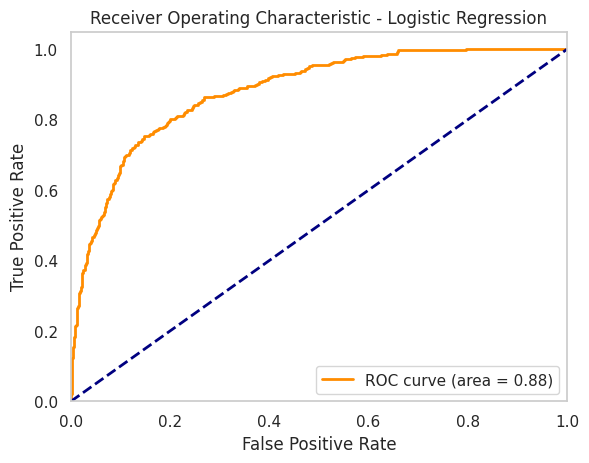



Accuracy: 0.87857847976308




Confusion matrix 

 [[1632   63]
 [ 183  148]]

True Positives (TP) =  1632

True Negatives (TN) =  148

False Positives (FP) =  63

False Negatives (FN) =  183




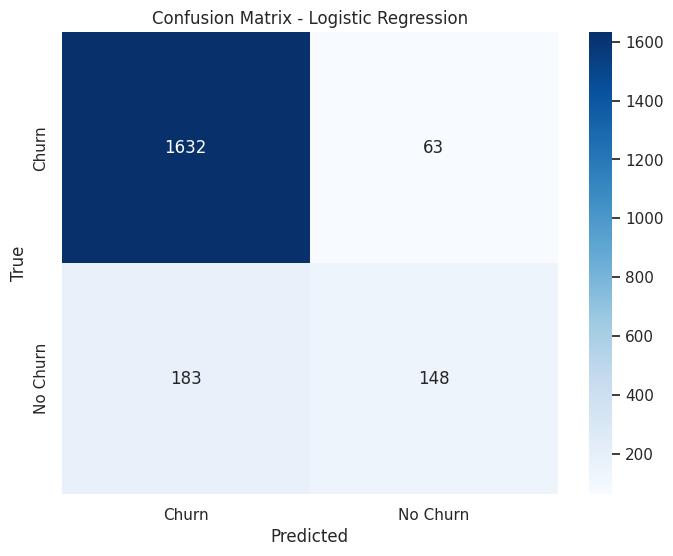



Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1695
           1       0.70      0.45      0.55       331

    accuracy                           0.88      2026
   macro avg       0.80      0.70      0.74      2026
weighted avg       0.87      0.88      0.87      2026


Machine Learning Model: Naive Bayes





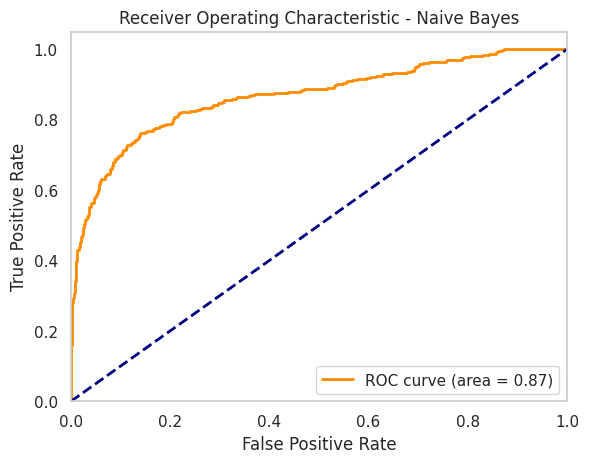



Accuracy: 0.8899308983218164




Confusion matrix 

 [[1611   84]
 [ 139  192]]

True Positives (TP) =  1611

True Negatives (TN) =  192

False Positives (FP) =  84

False Negatives (FN) =  139




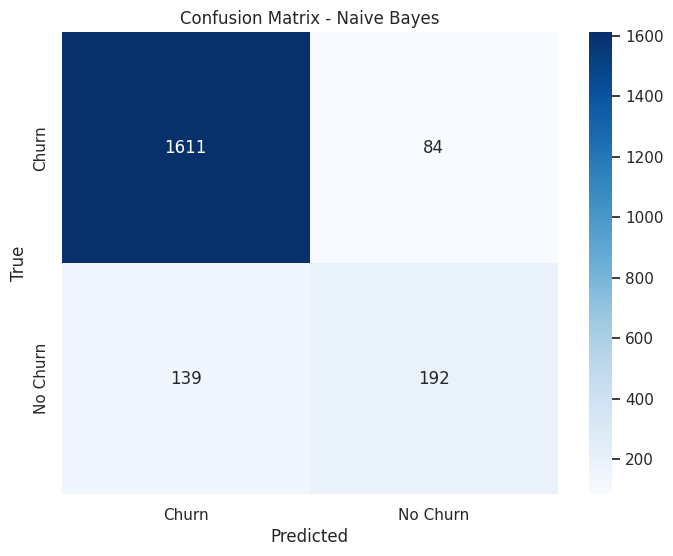



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1695
           1       0.70      0.58      0.63       331

    accuracy                           0.89      2026
   macro avg       0.81      0.77      0.78      2026
weighted avg       0.88      0.89      0.89      2026


Machine Learning Model: Decision Tree Classifier





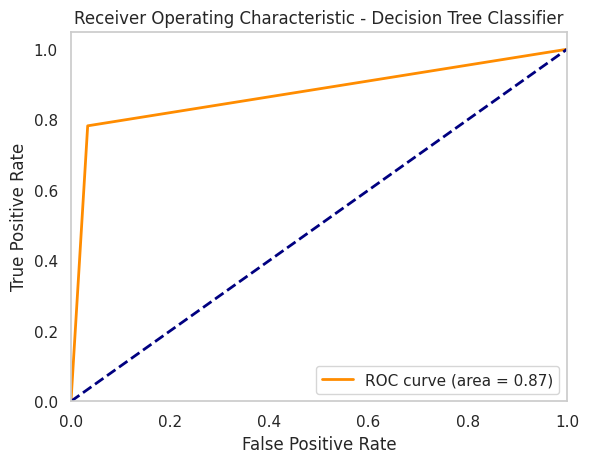



Accuracy: 0.9363277393879565




Confusion matrix 

 [[1638   57]
 [  72  259]]

True Positives (TP) =  1638

True Negatives (TN) =  259

False Positives (FP) =  57

False Negatives (FN) =  72




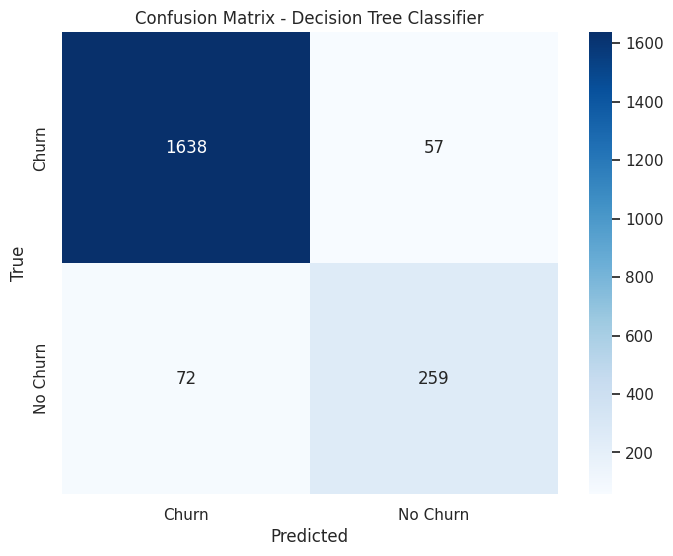



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1695
           1       0.82      0.78      0.80       331

    accuracy                           0.94      2026
   macro avg       0.89      0.87      0.88      2026
weighted avg       0.94      0.94      0.94      2026


Machine Learning Model: Random Forest





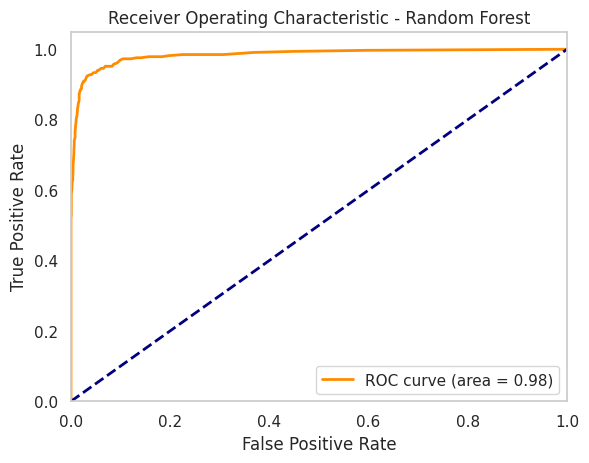



Accuracy: 0.9595261599210266




Confusion matrix 

 [[1674   21]
 [  61  270]]

True Positives (TP) =  1674

True Negatives (TN) =  270

False Positives (FP) =  21

False Negatives (FN) =  61




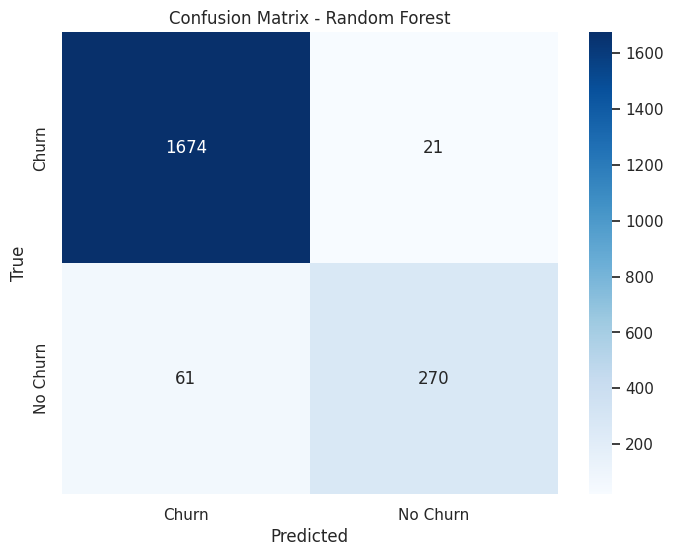



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1695
           1       0.93      0.82      0.87       331

    accuracy                           0.96      2026
   macro avg       0.95      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026


Machine Learning Model: Gradient Boosting





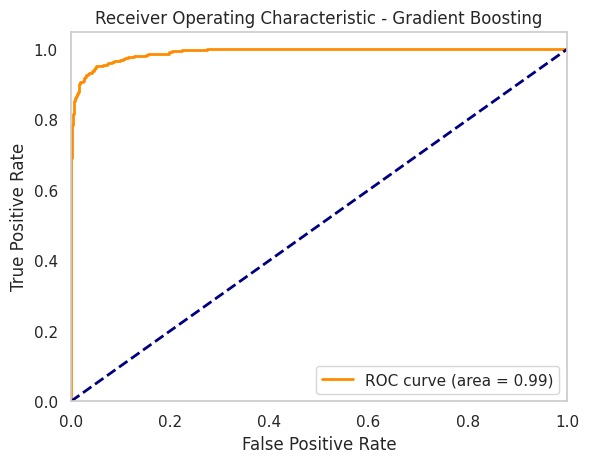



Accuracy: 0.9708785784797631




Confusion matrix 

 [[1685   10]
 [  49  282]]

True Positives (TP) =  1685

True Negatives (TN) =  282

False Positives (FP) =  10

False Negatives (FN) =  49




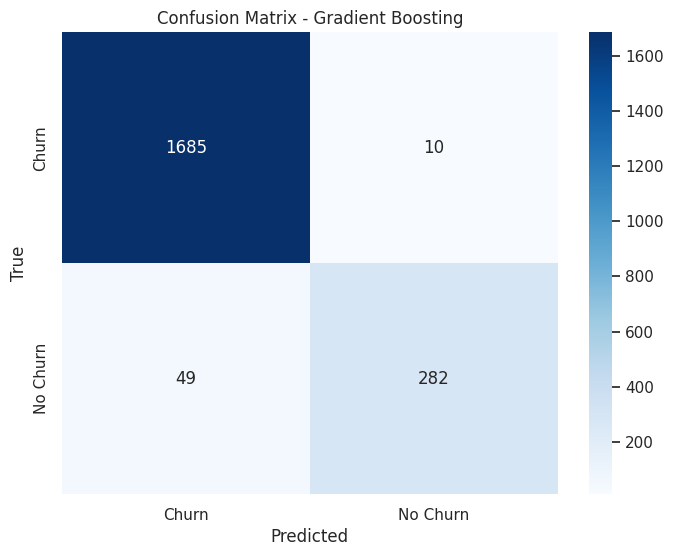



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1695
           1       0.97      0.85      0.91       331

    accuracy                           0.97      2026
   macro avg       0.97      0.92      0.94      2026
weighted avg       0.97      0.97      0.97      2026


Machine Learning Model: XGBoost





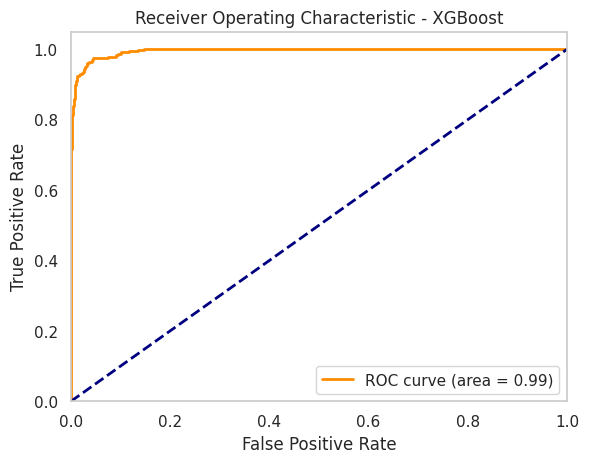



Accuracy: 0.972852912142152




Confusion matrix 

 [[1682   13]
 [  42  289]]

True Positives (TP) =  1682

True Negatives (TN) =  289

False Positives (FP) =  13

False Negatives (FN) =  42




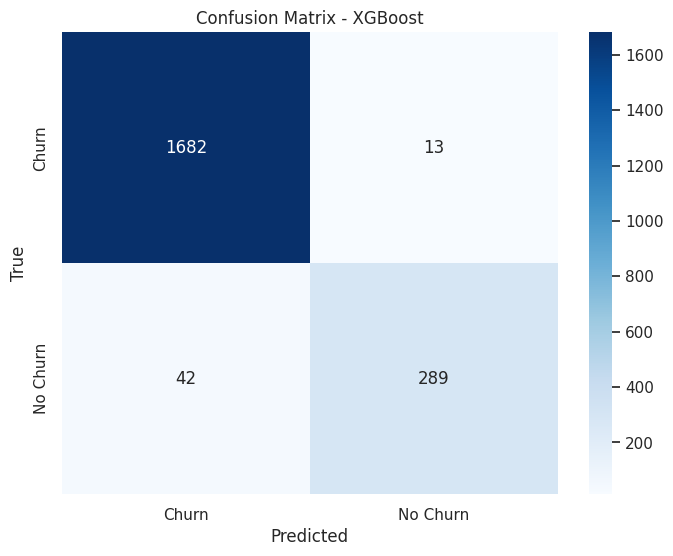



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1695
           1       0.96      0.87      0.91       331

    accuracy                           0.97      2026
   macro avg       0.97      0.93      0.95      2026
weighted avg       0.97      0.97      0.97      2026

[LightGBM] [Info] Number of positive: 1296, number of negative: 6805
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.159980 -> initscore=-1.658375
[LightGBM] [Info] Start training from score -1.658375

Machine Learning Model: LightGBM





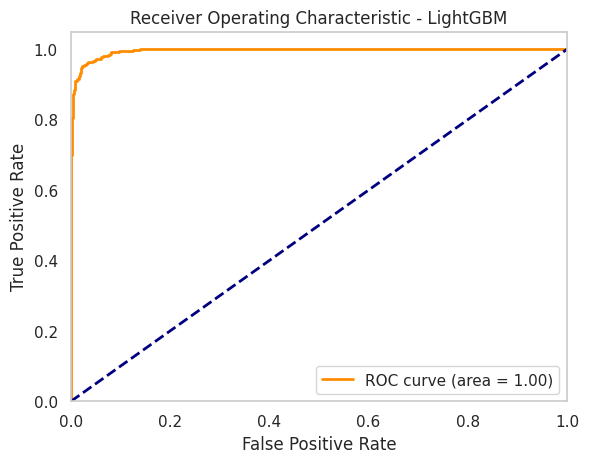



Accuracy: 0.9753208292201382




Confusion matrix 

 [[1682   13]
 [  37  294]]

True Positives (TP) =  1682

True Negatives (TN) =  294

False Positives (FP) =  13

False Negatives (FN) =  37




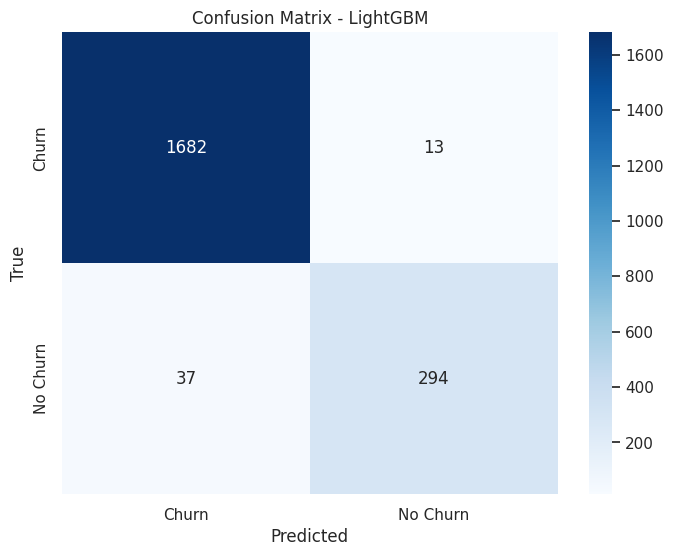



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1695
           1       0.96      0.89      0.92       331

    accuracy                           0.98      2026
   macro avg       0.97      0.94      0.95      2026
weighted avg       0.98      0.98      0.97      2026



In [37]:
# Iterating over each model
for name, model in models.items():

    # Training the model
    model.fit(X_train, y_train)

    # Prediction on the test set
    y_pred = model.predict(X_test)

    print()
    print("Machine Learning Model:", name)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    print()
    print()

    # Plotting the ROC Curve
    print()
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - {}'.format(name))
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()
    print()
    print()

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print()
    print()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print()
    print()
    print('Confusion matrix \n\n', cm)
    print('\nTrue Positives (TP) = ', cm[0,0])
    print('\nTrue Negatives (TN) = ', cm[1,1])
    print('\nFalse Positives (FP) = ', cm[0,1])
    print('\nFalse Negatives (FN) = ', cm[1,0])
    print()
    print()

    # Plotting the confusion matrix with Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - {}'.format(name))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(ticks=[0.5, 1.5], labels=['Churn', 'No Churn'])
    plt.yticks(ticks=[0.5, 1.5], labels=['Churn', 'No Churn'])
    plt.show()
    print()
    print()

    # Storing the metrics in the dictionary
    metrics[name] = {
        'AUC': roc_auc, 'Accuracy': acc}

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

## Model Analysis: Identifying the Model with the Greatest Adherence

In [38]:
# Creating a DataFrame with the results
df_metrics = pd.DataFrame(metrics).T # Transpose the DataFrame

# Displaying the DataFrame sorted by the AUC column in descending order
df_metrics_sorted = df_metrics.sort_values(by='Accuracy', ascending=False)
print()
df_metrics_sorted

,AUC,Accuracy
LightGBM,0.995400,0.975321
XGBoost,0.994799,0.972853
Gradient Boosting,0.990584,0.970879
Random Forest,0.983852,0.959526
Decision Tree Classifier,0.874425,0.936328
Naive Bayes,0.867175,0.889931
Logistic Regression,0.881505,0.878578


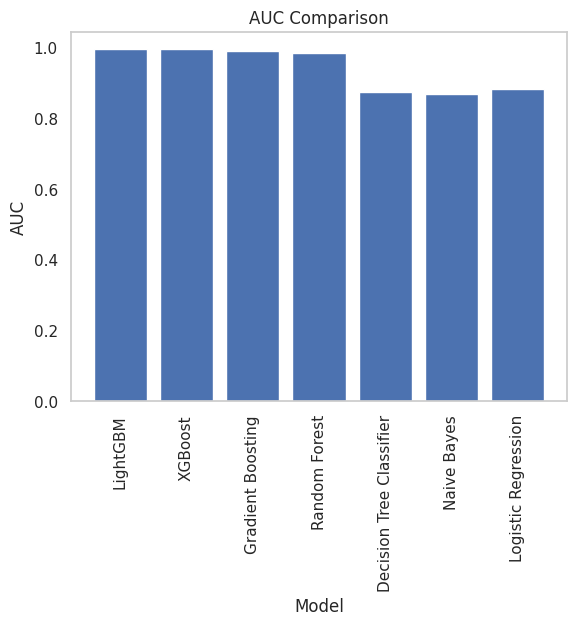

In [39]:
# Visualise
plt.figure
plt.bar(df_metrics_sorted.index, df_metrics_sorted['AUC'])
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('AUC')
plt.title('AUC Comparison')
plt.grid(False)
plt.show();

### Summarising the metrics

The results of the model evaluation are quite promising. The LightGBM model achieved an impressive accuracy of 97.5%, demonstrating its effectiveness in classifying data. Next, the Gradient Boosting model performed remarkably well, with an accuracy of 97.2%. These numbers indicate that both models are capable of making predictions with high accuracy.

The high accuracy achieved by the LightGBM model suggests that it is ready to be deployed in a production environment. However, there are still opportunities for improvement, either by tuning hyperparameters to further improve performance or by developing more efficient pipelines for data preprocessing.

In addition, it is important to consider not only accuracy and AUC, but also other performance metrics, such as recall, precision, and F1-score, especially in cases where the dataset is imbalanced or requires a specific emphasis on certain types of errors.

### Feature Importance

**Feature Importance Analysis: Revealing the Most Relevant Factors**

In this crucial step of the analysis, we explore the importance of features to understand which variables have the greatest impact on our model's prediction. Feature importance analysis provides valuable insights into which aspects of the data are most relevant to the model's decision-making.

**Identifying the Most Relevant Features**

By applying feature importance analysis, we can identify the features that have the greatest adherence and impact on the model's predictions. These features stand out for their ability to significantly influence the model's decisions, providing critical information about the main drivers of the phenomenon we are studying.

**Application of Insights**

The insights gained from feature importance analysis can guide strategic decisions in a variety of contexts. For example, these insights can be used to prioritize resource allocation, identify areas for improvement in business processes, or even to direct specific actions to mitigate identified risks.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


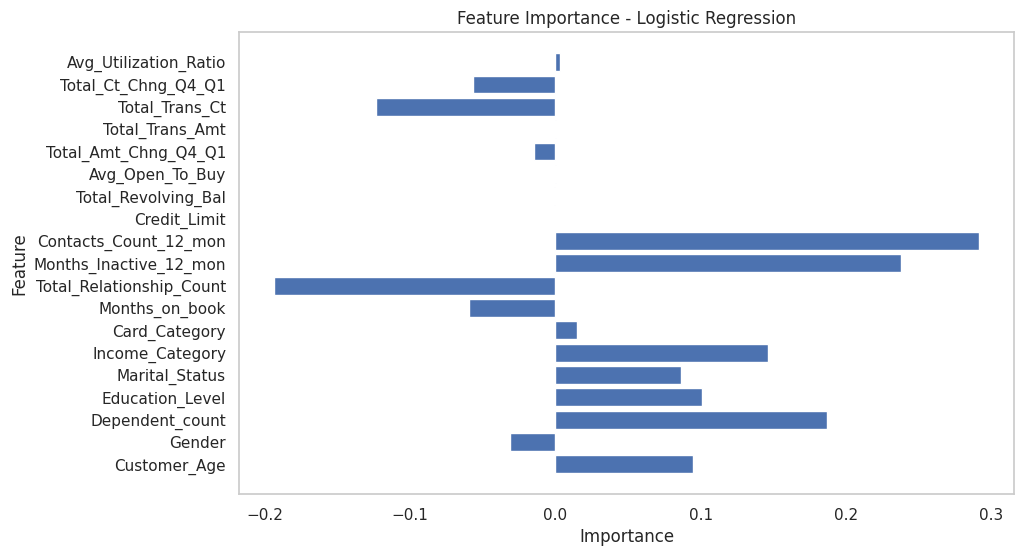

The model Naive Bayes does not support feature importance extraction.


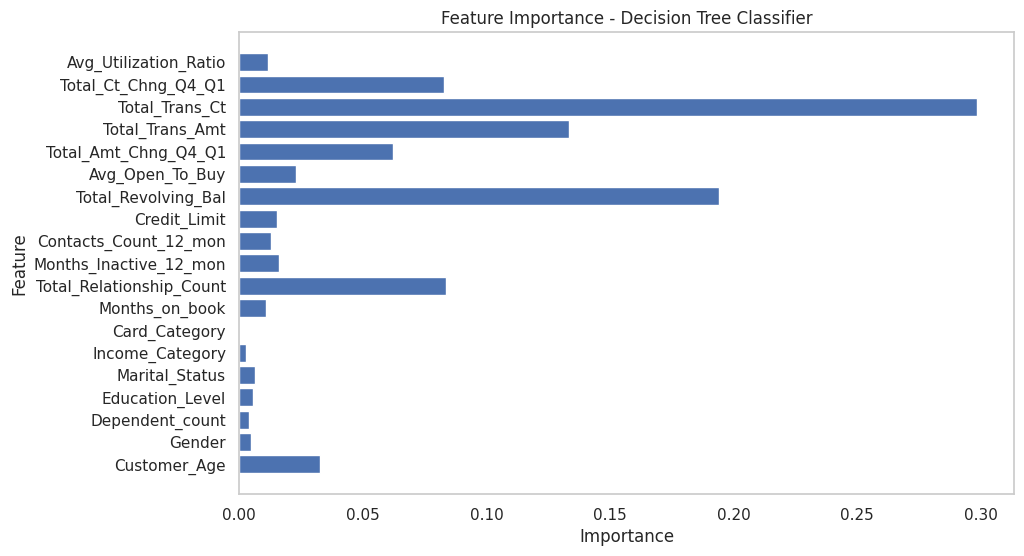

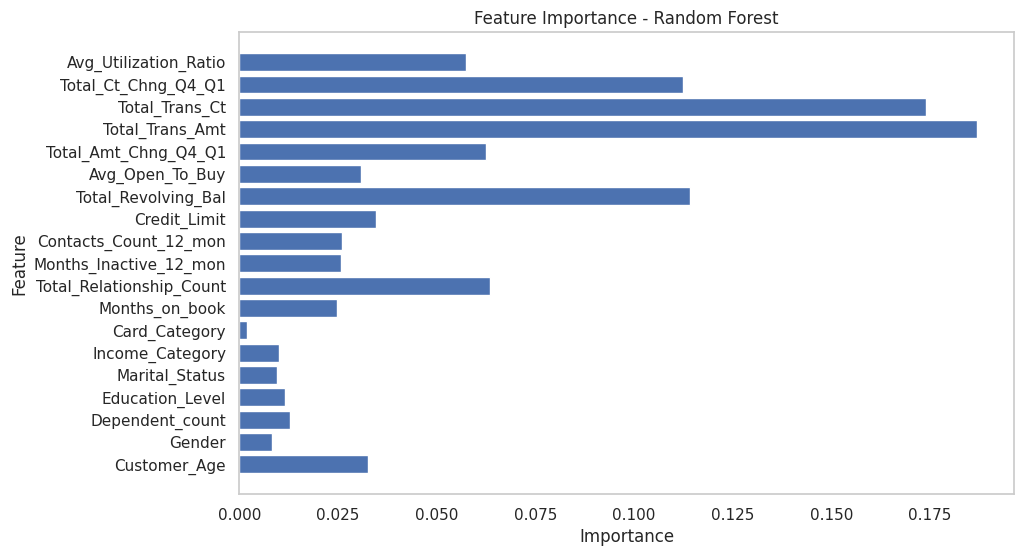

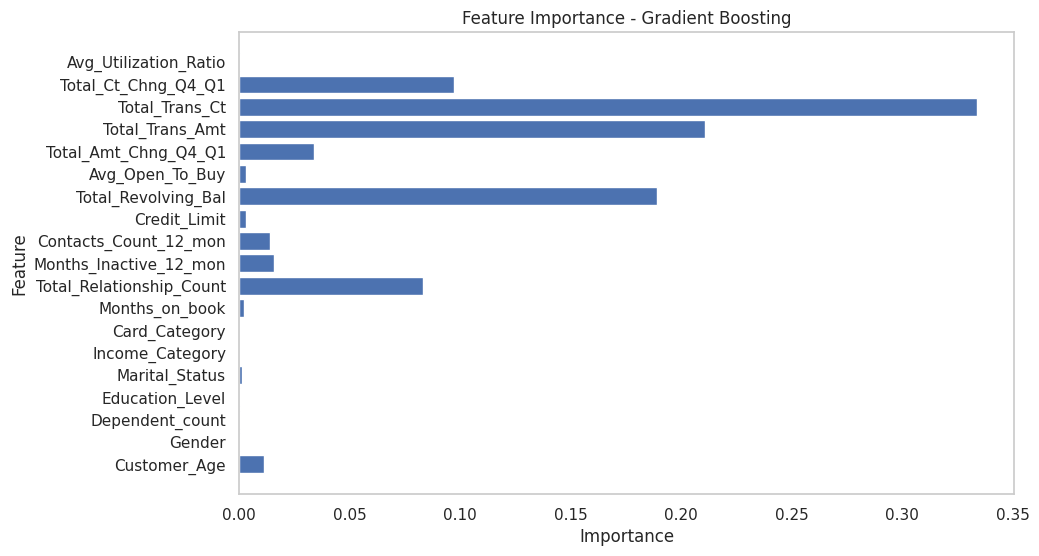

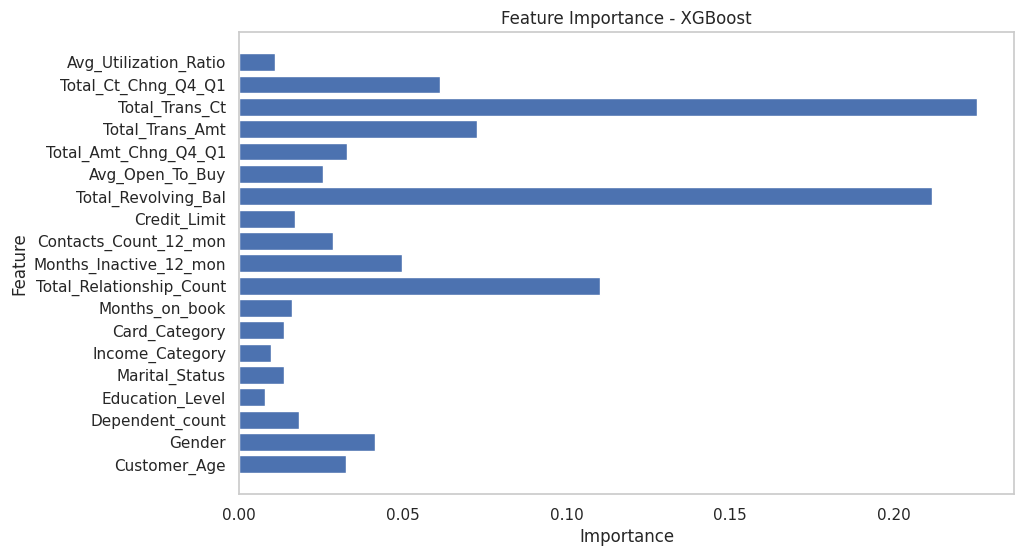

[LightGBM] [Info] Number of positive: 1296, number of negative: 6805
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.159980 -> initscore=-1.658375
[LightGBM] [Info] Start training from score -1.658375


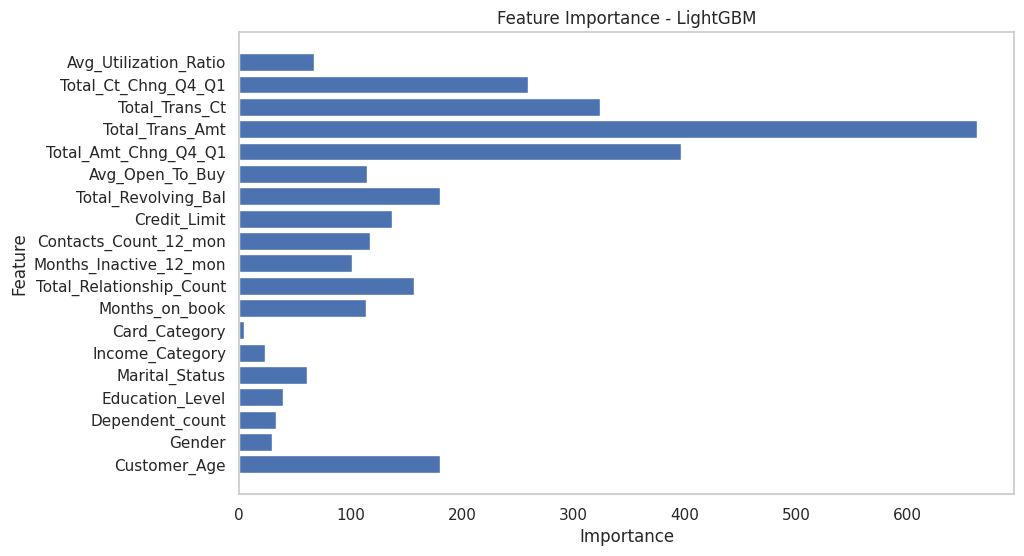

In [40]:
# Training the models and obtaining their feature importances
for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Check if the model has 'feature_importances_' or 'coef_' attributes
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        feature_importances = model.coef_[0]
    else:
        feature_importances = None

    # If feature importances are available, plot them
    if feature_importances is not None:
        # Plotting feature importances
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(feature_importances)), feature_importances)
        plt.title(f"Feature Importance - {model_name}")
        plt.ylabel("Feature")
        plt.xlabel("Importance")
        plt.grid(False)
        plt.yticks(range(len(feature_importances)), X_train.columns)  # Assuming X_train is a pandas DataFrame
        plt.show()
    else:
        print(f"The model {model_name} does not support feature importance extraction.")


In the analysis of the importance of the features carried out by the LightGBM model, a notable highlight falls on the variable "Total_Trans_Amt". This variable represents the total count of transactions made by a customer in a given period of time, be it monthly, quarterly or annually. In the context of financial services, especially in relation to credit cards, the number of transactions made is a fundamental metric for understanding customer behavior and engagement.

## Hyperparameter Tuning

We take the top 2 (LightGBM and XGBoost) and the bottom 2 models (Logistic Regression and Naive-Bayes Classifier), and implement hyperparameter tuning.

The top 2 are tuned to see how much more peformance we can eke out of them.
The bottom 2 models are used to demonstrate the effectiveness of hyperparameter tuning, and see whether they are able to catch up to the top performing ones.

### Setting up the hyperparameters

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Parameter grids

param_grid_lgbm = {
    'num_leaves': [15, 31, 63],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500]
}

param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 300, 500],
    'subsample': [0.7, 1.0]
}

param_grid_logreg = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__solver': ['lbfgs'],
}

param_grid_nb = {
    'var_smoothing': np.logspace(-12, -6, 7)
}

# Define GridSearchCV models

models = {
    "LightGBM": GridSearchCV(
        estimator=LGBMClassifier(),
        param_grid=param_grid_lgbm,
        cv=3,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    ),

    "XGBoost": GridSearchCV(
        estimator=XGBClassifier(eval_metric='logloss', use_label_encoder=False),
        param_grid=param_grid_xgb,
        cv=3,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    ),

    "Logistic Regression": GridSearchCV(
        estimator=Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression(max_iter=5000))
        ]),
        param_grid=param_grid_logreg,
        cv=3,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    ),

    "Naive Bayes": GridSearchCV(
        estimator=GaussianNB(),
        param_grid=param_grid_nb,
        cv=3,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )
}

### Evaluating the tuned models


----------------------------
TUNING MODEL: LightGBM
----------------------------

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Info] Number of positive: 1296, number of negative: 6805
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.159980 -> initscore=-1.658375
[LightGBM] [Info] Start training from score -1.658375
Best Parameters: {'learning_rate': 0.05, 'n_estimators': 500, 'num_leaves': 15}
Best CV AUC: 0.9932040781542169

ROC AUC: 0.9960217094885437


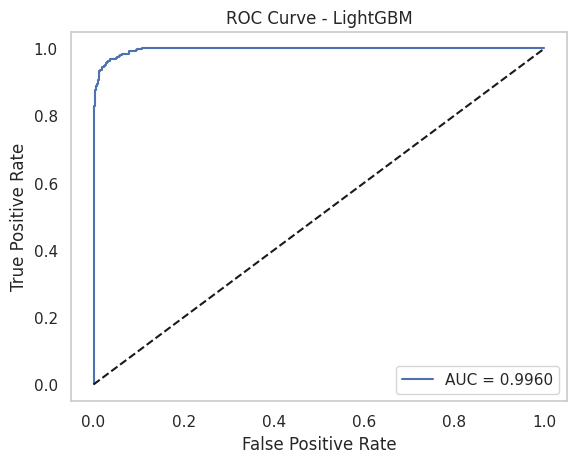


Accuracy: 0.9763079960513327

Confusion Matrix:
 [[1684   11]
 [  37  294]]

TP = 1684
TN = 294
FP = 11
FN = 37


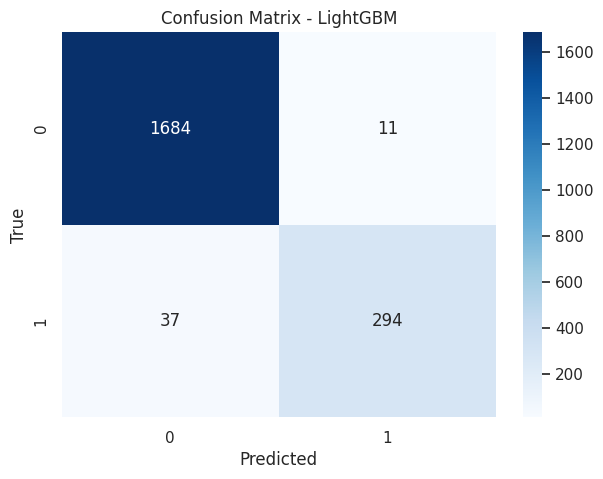


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1695
           1       0.96      0.89      0.92       331

    accuracy                           0.98      2026
   macro avg       0.97      0.94      0.96      2026
weighted avg       0.98      0.98      0.98      2026


----------------------------
TUNING MODEL: XGBoost
----------------------------

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:06:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Best CV AUC: 0.9924478588573068

ROC AUC: 0.9952231995650973


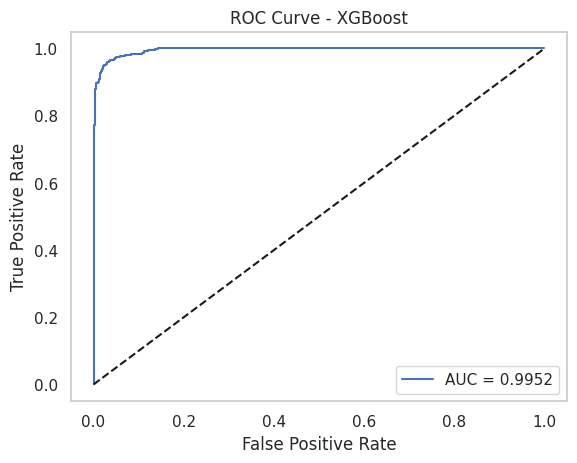


Accuracy: 0.9777887462981244

Confusion Matrix:
 [[1685   10]
 [  35  296]]

TP = 1685
TN = 296
FP = 10
FN = 35


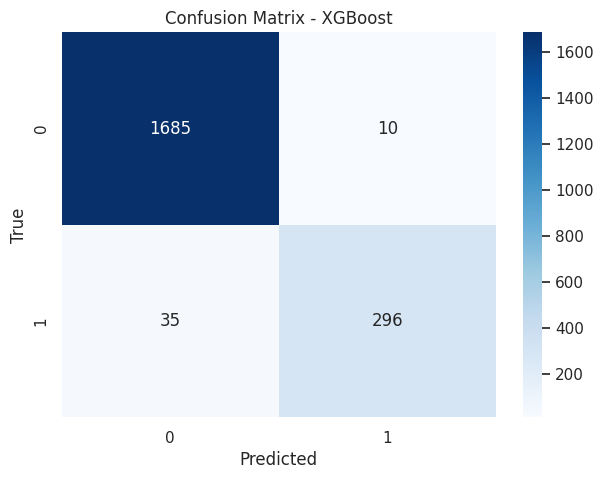


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1695
           1       0.97      0.89      0.93       331

    accuracy                           0.98      2026
   macro avg       0.97      0.94      0.96      2026
weighted avg       0.98      0.98      0.98      2026


----------------------------
TUNING MODEL: Logistic Regression
----------------------------

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'clf__C': 10, 'clf__solver': 'lbfgs'}
Best CV AUC: 0.9215482888774963

ROC AUC: 0.9216889910791469


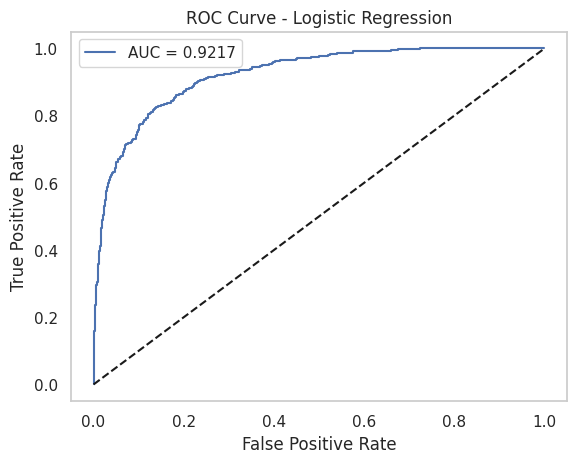


Accuracy: 0.9052319842053307

Confusion Matrix:
 [[1649   46]
 [ 146  185]]

TP = 1649
TN = 185
FP = 46
FN = 146


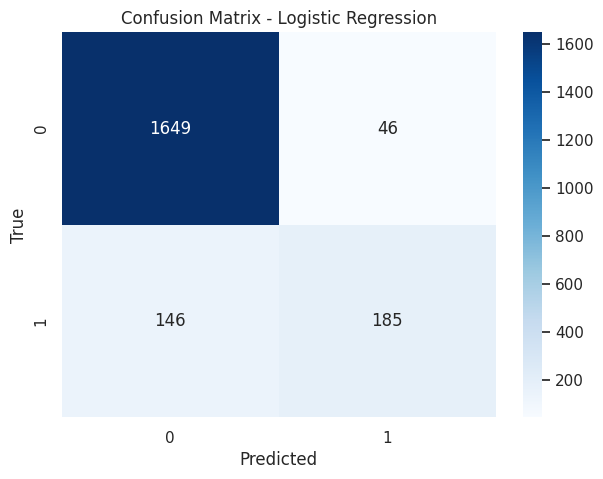


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1695
           1       0.80      0.56      0.66       331

    accuracy                           0.91      2026
   macro avg       0.86      0.77      0.80      2026
weighted avg       0.90      0.91      0.90      2026


----------------------------
TUNING MODEL: Naive Bayes
----------------------------

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best Parameters: {'var_smoothing': np.float64(1e-09)}
Best CV AUC: 0.8708591796574426

ROC AUC: 0.8671746473099307


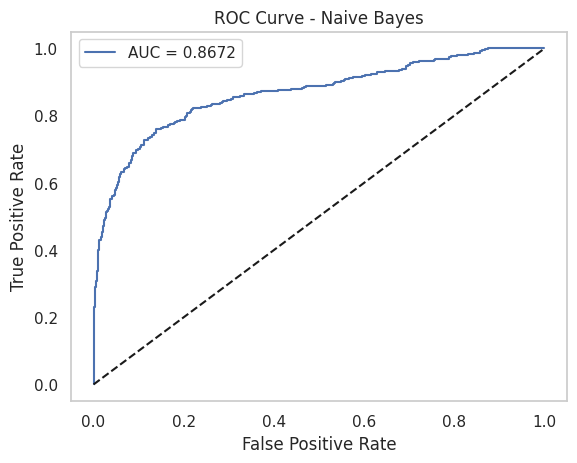


Accuracy: 0.8899308983218164

Confusion Matrix:
 [[1611   84]
 [ 139  192]]

TP = 1611
TN = 192
FP = 84
FN = 139


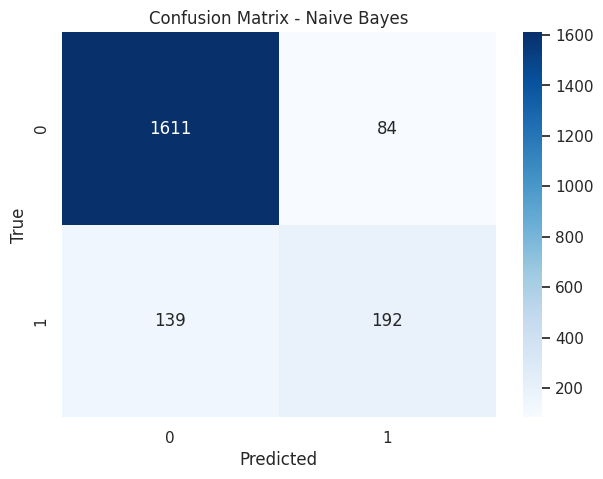


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1695
           1       0.70      0.58      0.63       331

    accuracy                           0.89      2026
   macro avg       0.81      0.77      0.78      2026
weighted avg       0.88      0.89      0.89      2026



In [42]:
from sklearn.metrics import (
    roc_curve, auc,
    accuracy_score, confusion_matrix,
    classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

metrics_new = {}

# Evaluation Loop
for name, model in models.items():

    print("\n----------------------------")
    print("TUNING MODEL:", name)
    print("----------------------------\n")

    # Fit the GridSearchCV
    model.fit(X_train, y_train)

    print("Best Parameters:", model.best_params_)
    print("Best CV AUC:", model.best_score_)

    # Use the best model found by grid search
    best_model = model.best_estimator_

    # Predictions
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:,1]

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    print("\nROC AUC:", roc_auc)

    # Plot ROC
    plt.figure()
    plt.plot(fpr, tpr, label='AUC = {:.4f}'.format(roc_auc))
    plt.plot([0,1],[0,1],'k--')
    plt.title(f"ROC Curve - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(False)
    plt.show()

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print("\nAccuracy:", acc)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:\n", cm)

    print('\nTP =', cm[0,0])
    print('TN =', cm[1,1])
    print('FP =', cm[0,1])
    print('FN =', cm[1,0])

    # Plot Confusion Matrix
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Store metrics
    metrics_new[name] = {
        'AUC': roc_auc,
        'Accuracy': acc,
        'Best Params': model.best_params_
    }

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

In [44]:
# Creating a DataFrame with the results
df_metrics_new = pd.DataFrame(metrics_new).T # Transpose the DataFrame

# Displaying the DataFrame sorted by the AUC column in descending order
df_metrics_new_sorted = df_metrics_new.sort_values(by='Accuracy', ascending=False)
print()
df_metrics_new_sorted

,AUC,Accuracy,Best Params
XGBoost,0.995223,0.977789,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
LightGBM,0.996022,0.976308,"{'learning_rate': 0.05, 'n_estimators': 500, '..."
Logistic Regression,0.921689,0.905232,"{'clf__C': 10, 'clf__solver': 'lbfgs'}"
Naive Bayes,0.867175,0.889931,{'var_smoothing': 1e-09}


### Model Performance Summary After Hyperparameter Tuning

 *   XGBoost achieved the highest accuracy (97.78%), closely followed by LightGBM (97.63%), confirming that gradient-boosted tree ensembles perform exceptionally well on this dataset.
*   LightGBM recorded the highest AUC (0.9960), indicating slightly better ranking performance despite a marginally lower accuracy than XGBoost.
*   Logistic Regression performed moderately, with 90.52% accuracy, reflecting its linear nature and limited ability to capture complex relationships.
*   Naive Bayes showed the lowest performance, consistent with its strong independence assumptions, which may not hold in this dataset.

One unique thing that we can see here is that LightGBM slightly surpasses XGBoost in AUC, suggesting marginally superior capability in ranking positive vs negative instances.

## Conclusion

Hyperparameter tuning notably enhanced model performance, especially for the ensemble models.
XGBoost and LightGBM emerge as the most effective algorithms, with XGBoost being the best overall in terms of accuracy and LightGBM exhibiting top-tier discriminative performance.
These results indicate that boosted decision-tree ensembles are the optimal choice for this prediction task, offering both high accuracy and excellent sensitivity-specificity trade-offs.

### Saving the models


In [45]:
import os
import json
import pickle
from datetime import datetime

# Directory to save the best XGBoost model
xgb_dir = "ML_Churn_Prediction/ML_model"
os.makedirs(xgb_dir, exist_ok=True)

# Extract the tuned GridSearchCV model
xgb_grid = models["XGBoost"]

# Fit if not already fitted
xgb_grid.fit(X_train, y_train)

# Best performing tuned model
best_xgb_model = xgb_grid.best_estimator_

# Best params
best_params = xgb_grid.best_params_

# Model performance
xgb_accuracy = best_xgb_model.score(X_test, y_test)

# Create a timestamp to ensure files never overwrite
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

model_filename = f"XGBoost_Tuned_{timestamp}.pkl"
params_filename = f"XGBoost_Params_{timestamp}.json"

model_path = os.path.join(xgb_dir, model_filename)
params_path = os.path.join(xgb_dir, params_filename)

# SAVE THE MODEL (PICKLE)
with open(model_path, "wb") as file:
    pickle.dump(best_xgb_model, file)

# SAVE BEST PARAMETERS (JSON)
with open(params_path, "w") as json_file:
    json.dump(best_params, json_file, indent=4)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:25:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
